In [ ]:
# https://www.empiwifo.uni-freiburg.de/teaching/winter-term-10-11/materialien-portfolio-analysis/pca.pdf

In [ ]:
# https://medium.com/@andymdc31/using-pca-in-a-machine-learning-pipeline-b6fe3492b1b9


![](https://miro.medium.com/max/1084/1*tfG0aKhb9RiawtH2rB-TvA.gif)

$$\large \text{PCA تحليل المكونات الرئيسية    }$$


-   تعلم في غياب الاشراف : منهجية استخلاص البيانات ذات تباين من مصفوفة ذات ابعاد عالية

- عملية اسقاط عمودي يتم من خلالها تحويل البيانات إلى مصفوفة ذات ابعاد أقل من مصفوفة البيانات الأصلية مع تباين أكبر.

In [1]:
# تحميل المكتبات
import pandas as pd
from sklearn import datasets
# تحميل البيانات
X, y = datasets.load_digits(return_X_y=True)

In [2]:
# حجم مصفوفة البيانات
X.shape

(1797, 64)

In [3]:
# نموذج بيانات
X[100] , y[100]

(array([ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  2.,  0.,  0.,  0.,  0.,
        15., 12.,  1., 16.,  4.,  0.,  0.,  4., 16.,  2.,  9., 16.,  8.,
         0.,  0.,  0., 10., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
        13.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.]), 4)

Text(0.5, 1.0, '4')

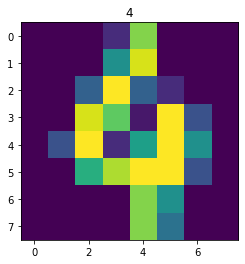

In [4]:
# رسم محتوى احدى المصفوفات
import matplotlib.pyplot as plt
# تغيير ابعاد مصفوفة السجل
plt.imshow(X[100].reshape(8,8))
plt.title(y[100])

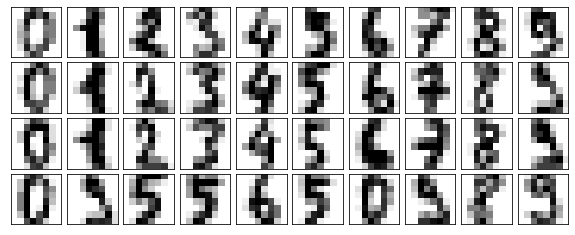

In [5]:
# اظهار محتوى قاعدة البيانات للأرقام
def plot_digits(data):
    fig, ax = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, g in enumerate(ax.flat):
        g.imshow(X[i].reshape(8, 8),
                  cmap='binary' , interpolation='nearest',
                  clim=(0, 16))
plot_digits(X)

# تقليص الابعاد
![](https://notsquirrel.com/assets/img/pca/flatten.gif)

-  معالجة سجلات البيانات

![](https://notsquirrel.com/assets/img/pca/twostack.gif)

# <h2  dir="rtl">معالجة تقليص البيانات من خلال تركيبة خوارزمية تكرارية</h2>

In [6]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=4).fit(X)
X_pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979])

In [7]:
PCA(n_components=4).fit_transform(X)

array([[ -1.25946659,  21.27488323,  -9.46305461,  13.01422905],
       [  7.95761155, -20.7686985 ,   4.43950675, -14.89368012],
       [  6.9919237 ,  -9.95598595,   2.95856084, -12.2883777 ],
       ...,
       [ 10.80128419,  -6.96025141,   5.59955753,  -7.22773826],
       [ -4.8721003 ,  12.42395353, -10.17086573,  -6.6687739 ],
       [ -0.34438983,   6.3655491 ,  10.77370816,  -7.72619185]])

In [8]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import numpy as np

for n, c in zip(np.geomspace(2,64, 6).astype("int") , np.logspace(-4, 4, 6)):
  X_pca = PCA(n_components=n).fit_transform(X)
  logreg=LogisticRegression(C=c, max_iter=1000, solver="liblinear")
  logreg.fit(X_pca, y)
  #print( f"{n:-<10}: {c} \n")
  #  تحديد درجة الدقة لكل عدد من الأعمدة التي تم تقليصها
  print(f" {n} ,{c :-<20} Accuracy scored : {logreg.score(X_pca,y):.3}")


 2 ,0.0001-------------- Accuracy scored : 0.449
 3 ,0.003981071705534973 Accuracy scored : 0.622
 7 ,0.15848931924611143- Accuracy scored : 0.866
 15 ,6.309573444801943--- Accuracy scored : 0.957
 31 ,251.18864315095823-- Accuracy scored : 0.99
 63 ,10000.0------------- Accuracy scored : 0.999


In [9]:
import numpy as np
np.geomspace(2,64, 6).astype("int")

array([ 2,  3,  7, 15, 31, 63])

## PipeLine  توظيف معالجة متسلسلىة 

In [10]:
# نوظيف انحدار لوجستي لتحديد الرقم المطابق لكل رسمة 

from sklearn.pipeline import make_pipeline
pca=PCA()
model = make_pipeline(
    pca, 
    # max_iter  عدد مرات معالجة البيانات
    # tol  التوقف عند مستوى تباين لا يفوق 10%  فيما بين عرضين متتالين للبيانات
    LogisticRegression(max_iter=10000, tol=0.1)
)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=42, test_size=.3)

In [12]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
# تحديد معايير معالجة البيانات 
from sklearn.model_selection import GridSearchCV

param_grid = {
    'pca__n_components': [5, 15, 30, 45, 60],
    'logisticregression__C': np.logspace(-4, 4, 4),
    'logisticregression__solver':["liblinear", "lbfgs"],
    'logisticregression__penalty':["l1", "l2"], 
    "logisticregression__max_iter":[500, 800, 1000]
}

In [13]:
# التاكد من تسمية المعايير أعلاه
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pca', 'logisticregression', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

In [14]:
# توظيف شبكة البحث لتحديد افضل معايير معالجة البيانات
search = GridSearchCV(model, param_grid, n_jobs=-1, refit=True  )


In [15]:
# تدريب البيانت
search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                       

In [16]:
#grid.best_score_ is the average of all cv folds for a single combination of the parameters  specified  Accuracy  افضل نتيجة  تعكس الدقة في هذه الحال
f"Best parameter : {search.best_score_:.3}"  

'Best parameter : 0.959'

In [17]:
# أفضل المعايير 
print(search.best_params_)

{'logisticregression__C': 0.046415888336127774, 'logisticregression__max_iter': 500, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs', 'pca__n_components': 45}


In [18]:
#json  بنية افضل التقديرات 
search.best_estimator_.named_steps

{'logisticregression': LogisticRegression(C=0.046415888336127774, class_weight=None, dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=500, multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                    warm_start=False),
 'pca': PCA(copy=True, iterated_power='auto', n_components=45, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False)}

In [ ]:

search.best_estimator_.score(X_test, y_test)

0.9703703703703703

##رسم بياني لتطور درجة الدقة في ضوء تقليص ابعاد المصفوفة 



In [ ]:
# تدريب 
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# الأبعاد الأصلية
pca.n_components_

64

In [ ]:
# نسبة تباين كل خاصية  في ضوء تغير أبعاد مصوفة الباينات
pca.explained_variance_ratio_ #.cumsum()

array([1.48700307e-01, 1.36312819e-01, 1.20076302e-01, 8.45954441e-02,
       5.63897588e-02, 4.92359652e-02, 4.26269512e-02, 3.56750500e-02,
       3.33886752e-02, 3.09762981e-02, 2.38644587e-02, 2.31836145e-02,
       1.84609017e-02, 1.76094833e-02, 1.49145715e-02, 1.44399060e-02,
       1.33425704e-02, 1.20314091e-02, 1.01825456e-02, 9.35663008e-03,
       8.86570197e-03, 7.94401834e-03, 7.38379622e-03, 7.21963027e-03,
       6.61666884e-03, 6.04174507e-03, 5.78109620e-03, 5.07542185e-03,
       4.80219522e-03, 4.25491178e-03, 3.85070610e-03, 3.49144303e-03,
       3.30020409e-03, 3.23040164e-03, 2.97963377e-03, 2.92775423e-03,
       2.54680552e-03, 2.32163379e-03, 2.26096803e-03, 2.14672756e-03,
       1.85255176e-03, 1.54541608e-03, 1.47490042e-03, 1.36751900e-03,
       1.13053635e-03, 1.06487835e-03, 9.30176780e-04, 8.45456196e-04,
       5.16384945e-04, 3.82314016e-04, 2.29218278e-04, 7.80342968e-05,
       6.03049098e-05, 4.69778608e-05, 4.00961919e-05, 1.65922509e-05,
      

In [ ]:
np.arange(1, pca.n_components_ + 1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

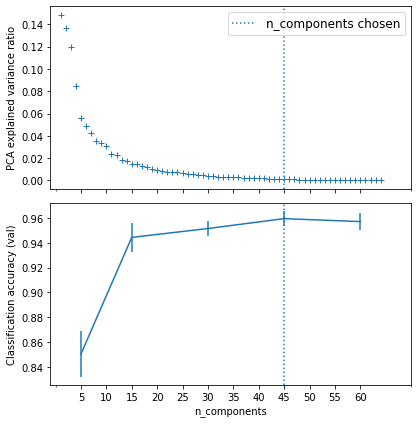

In [ ]:
# التخطيط البياني
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))




# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.axvline(45, linestyle=':')
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')
ax1.set_xticks(np.arange(5, 64,5 ))
plt.xlim(-1, 70)

plt.tight_layout()
plt.show()

# Learning Curve

In [ ]:
pip install scikit-plot 

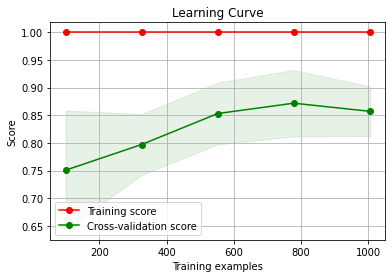

In [ ]:
import scikitplot as skplt

skplt.estimators.plot_learning_curve(model, X_train, y_train, scoring="r2" )

In [ ]:
from sklearn import metrics
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

# Prediction 

In [ ]:
from sklearn import metrics
y_pred=search.predict(X_test)
f"R2  : {metrics.r2_score(y_test, y_pred)}"  

'R2  : 0.9520381840930505'

Text(0.5, 1.0, '3')

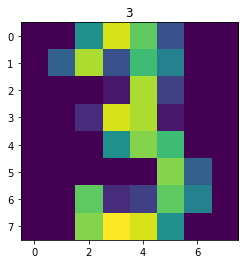

In [ ]:
# رسم محتوى احدى المصفوفات
import matplotlib.pyplot as plt
# تغيير ابعاد مصفوفة السجل
plt.imshow(X_test[2].reshape(8,8))
plt.title(  y_test[2])  #  to replace with y_pred

In [ ]:
y_test[10]

1

In [ ]:
search.predict(X_test[10])

ValueError: ignored